In [1]:
import util
import vqe_class
import ansatz_circ

import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
from matplotlib import animation

from qiskit.primitives import Estimator,Sampler
from qiskit_aer import AerSimulator
from qiskit.algorithms.optimizers import COBYLA,NFT,GradientDescent,ADAM

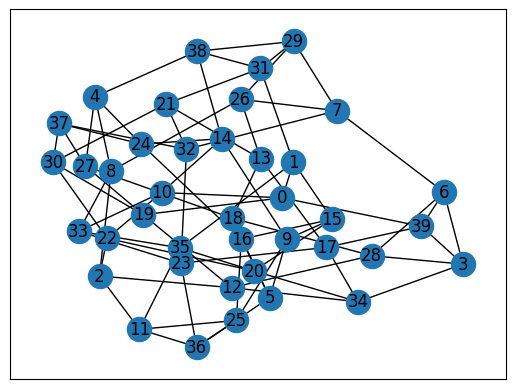

In [2]:
n_vertex=40
graph=nx.random_regular_graph(4,n_vertex)
p=0.6
#graph=nx.gnp_random_graph(n_vertex,p)
#graph=nx.barabasi_albert_graph(n_vertex,3)
sum=0
# Assign random weights to edges
for edge in graph.edges():
    a=np.random.rand(1)[0]
    sum+=a
    #graph.edges[edge]['weight'] = np.random.rand()
    graph.edges[edge]['weight'] = 1
nx.draw_networkx(graph)

In [3]:
nft=NFT(maxiter=1000, maxfev=1024, disp=False, reset_interval=1000, options=None)
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
adam=ADAM(maxiter=300, tol=1e-02, lr=0.1, beta_1=0.98, beta_2=0.99, noise_factor=1e-08, eps=1e-2, amsgrad=True, snapshot_dir=None)
g_d=GradientDescent(maxiter=300,learning_rate=0.01, tol=0.01, callback=None, perturbation=None)



estimator_dens= AerSimulator(method='density_matrix')
estimator_state= AerSimulator(method='statevector')
estimator = Estimator()
sampler = Sampler()

In [4]:
max=util.branch_and_bound(graph)[0]
gw_cut=util.gw_cut(graph)

In [5]:
print(max)
print(gw_cut)

68.0
66


In [6]:
num_qubits=math.ceil(math.log((n_vertex/3+1),2))+1
depth=5
v=gw_cut
beta=0.5
alpha=np.sqrt(num_qubits)

obs=util.vertex_to_pauli_full_encoding(n_vertex,num_qubits,num_qubits,0)

ansatz=ansatz_circ.ansatz_efficient(num_qubits,depth)


intermediate_info= []
def callback(data):
                intermediate_info.append(data)


optimizer=cobyla
custom_vqe = vqe_class.VQE_full_encoding(graph,estimator,ansatz,optimizer,obs,num_qubits,max,alpha,beta,v,initial_parameters=None,callback=callback)
result= custom_vqe.compute_minimum_eigenvalue(min)
print(min)
print(result.eigenstate)
print(result.eigenvalue)

93
{'ZIIII': 1, 'IZIII': 1, 'IIZII': 1, 'IIIZI': 1, 'IIIIZ': 1, 'XIIII': 1, 'IXIII': 1, 'IIXII': 1, 'IIIXI': 1, 'IIIIX': 1, 'YIIII': 1, 'IYIII': 1, 'IIYII': 1, 'IIIYI': 1, 'IIIIY': 1, 'ZZIII': 1, 'ZIZII': 1, 'ZIIZI': 1, 'ZIIIZ': 1, 'IZZII': 1, 'IZIZI': 1, 'IZIIZ': 1, 'IIZZI': 1, 'IIZIZ': 1, 'IIIZZ': 1, 'XXIII': 1, 'XIXII': 1, 'XIIXI': 1, 'XIIIX': 1, 'IXXII': 1, 'IXIXI': 1, 'IXIIX': 1, 'IIXXI': 1, 'IIXIX': 1, 'IIIXX': 1, 'YYIII': 1, 'YIYII': 1, 'YIIYI': 1, 'YIIIY': 1, 'IYYII': 1}
-58.0
<built-in function min>
['1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0']
58.0


In [7]:
num_qubits=math.ceil(math.log((n_vertex/3+1),2))+1

depth=num_qubits+2
v=0
beta=0.5
alpha=num_qubits

obs=util.vertex_to_pauli_full_encoding(n_vertex,num_qubits,num_qubits,0)

ansatz=ansatz_circ.ansatz_efficient(num_qubits,depth)


intermediate_info= []
def callback(data):
                intermediate_info.append(data)


optimizer=cobyla
custom_vqe = vqe_class.VQE_full_encoding_quad(graph,estimator,ansatz,optimizer,obs,num_qubits,max,alpha,beta,v,initial_parameters=None,callback=callback)
result= custom_vqe.compute_minimum_eigenvalue(min)
print(min)
print(result.eigenstate)
print(result.eigenvalue)

93
{'ZIIII': 1, 'IZIII': 1, 'IIZII': 1, 'IIIZI': 1, 'IIIIZ': 1, 'XIIII': 1, 'IXIII': 1, 'IIXII': 1, 'IIIXI': 1, 'IIIIX': 1, 'YIIII': 1, 'IYIII': 1, 'IIYII': 1, 'IIIYI': 1, 'IIIIY': 1, 'ZZIII': 1, 'ZIZII': 1, 'ZIIZI': 1, 'ZIIIZ': 1, 'IZZII': 1, 'IZIZI': 1, 'IZIIZ': 1, 'IIZZI': 1, 'IIZIZ': 1, 'IIIZZ': 1, 'XXIII': 1, 'XIXII': 1, 'XIIXI': 1, 'XIIIX': 1, 'IXXII': 1, 'IXIXI': 1, 'IXIIX': 1, 'IIXXI': 1, 'IIXIX': 1, 'IIIXX': 1, 'YYIII': 1, 'YIYII': 1, 'YIIYI': 1, 'YIIIY': 1, 'IYYII': 1}


In [ ]:
num_qubits=math.ceil(math.log((n_vertex/3+1),2))+1
depth=5
v=gw_cut
beta=0.5
alpha=np.sqrt(num_qubits)

obs=util.vertex_to_pauli_full_encoding(n_vertex,num_qubits,num_qubits,0)
ansatz=ansatz_circ.ansatz_efficient(num_qubits,depth)
circuits=ansatz_circ.multibasis_ansatz(ansatz)
beta=1
v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=1000, disp=True, rhobeg=1, tol=0.01, options=None)



intermediate_info_init= []
def callback(data):
    intermediate_info_init.append(data)
qrao=vqe_class.QRAO_initial_state_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
result_init=qrao.compute_minimum_eigenvalue(min)
new_init_sep=result_init.optimal_parameters



v=0
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init_sep,callback=callback)
result_qrao= qrao.compute_minimum_eigenvalue(min)
new_init=result_qrao.optimal_parameters
v=gw_cut/2
gamma=1
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
#intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
result_qrao_sep_warm= qrao.compute_minimum_eigenvalue(min)




v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init_sep,callback=callback)
result_qrao_non= qrao.compute_minimum_eigenvalue(min)
new_init=result_qrao_non.optimal_parameters
v=gw_cut/2
gamma=1

cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
#intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
result_qrao_non_sep_warm= qrao.compute_minimum_eigenvalue(min)


45
{'ZIII': 1, 'IZII': 1, 'IIZI': 1, 'IIIZ': 1, 'XIII': 1, 'IXII': 1, 'IIXI': 1, 'IIIX': 1, 'YIII': 1, 'IYII': 1, 'IIYI': 1, 'IIIY': 1, 'ZZII': 1, 'ZIZI': 1, 'ZIIZ': 1, 'IZZI': 1, 'IZIZ': 1, 'IIZZ': 1, 'XXII': 1, 'XIXI': 1}
approxs
0.5764963429611073
-0.5760991443657346
0.38461538461538464
approxs
0.5760014802266954
-0.5751055307636391
0.38461538461538464
approxs
0.5796473487621456
-0.5821500918615289
0.6923076923076923
approxs
0.5796564387662296
-0.582244476026138
0.5769230769230769
approxs
0.5803637183022833
-0.5836539712140396
0.6923076923076923
approxs
0.5787271090771802
-0.580650505277232
0.7307692307692307
approxs
0.5814609998258965
-0.5857738644009703
0.6923076923076923
approxs
0.5817896091675487
-0.5863877601088957
0.6923076923076923
approxs
0.5872025382092715
-0.5965051249891571
0.6923076923076923
approxs
0.586793883224876
-0.5956929727312101
0.6923076923076923
approxs
0.5878408952429985
-0.5977006139549313
0.6923076923076923
approxs
0.5832106050697277
-0.5890899641287339
0.73

In [ ]:
v=0
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
result_qrao_sep= qrao.compute_minimum_eigenvalue(min)



v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.05, tol=0.01, options=None)
intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,max,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
result_qrao_non_sep= qrao.compute_minimum_eigenvalue(min)


approxs
0.5550982621717462
-0.5401478981925455
0.46153846153846156
approxs
0.5511221925313186
-0.5344096127058232
0.46153846153846156
approxs
0.5527379477123083
-0.5354184230727327
0.5769230769230769
approxs
0.5578142181525222
-0.545800577284801
0.46153846153846156
approxs
0.5570820424489406
-0.5451156046612573
0.46153846153846156
approxs
0.5579153404727206
-0.5458331127906821
0.46153846153846156
approxs
0.557946455527191
-0.5458923180514704
0.46153846153846156
approxs
0.5607514448454575
-0.5507942114667148
0.5
approxs
0.5604925065260916
-0.5503076315028154
0.5
approxs
0.5635072481678075
-0.5550312859538185
0.5
approxs
0.5666995052587602
-0.559950748578998
0.5769230769230769
approxs
0.5643868849039427
-0.5561151930044352
0.5
approxs
0.5668210151062305
-0.5603374860559691
0.5
approxs
0.5703253351160472
-0.5665585680899252
0.5769230769230769
approxs
0.5702038350689304
-0.5661955966114379
0.5769230769230769
approxs
0.5727130340898063
-0.5705995560353501
0.5
approxs
0.5730372343374056
-0.5